In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(
    data={
        'smiles':[
            'CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C',
            'CC(=O)OC(CC(=O)O)C[N+](C)(C)C',
            'CC(CN)O',
            'C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl',
            'CCN1C=NC2=C(N=CN=C21)N',
            'CCC(C)(C(C(=O)O)O)O',
            'C(CCl)Cl',
            'C1=CC(=C(C=C1Cl)Cl)Cl',
            'C1CCC(=O)NCCCCCC(=O)NCC1',
            'C1C=CC(=NC1C(=O)O)C(=O)O',
            'C(C)(C)(C)(C)C'
        ],
        'mw':[
            203.24,
            204.24,
            75.11,
            202.55,
            163.18,
            148.16,
            98.96,
            181.4,
            226.32,
            169.13,
            100.00
        ]
    }
)

df

,smiles,mw
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24
2,CC(CN)O,75.11
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55
4,CCN1C=NC2=C(N=CN=C21)N,163.18
5,CCC(C)(C(C(=O)O)O)O,148.16
6,C(CCl)Cl,98.96
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13


***

# Visualizando moléculas

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

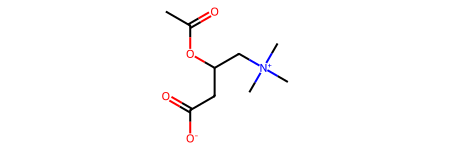

In [4]:
mol = Chem.MolFromSmiles(df['smiles'].iloc[0])
mol

[13:13:13] Explicit valence for atom # 0 C, 5, is greater than permitted


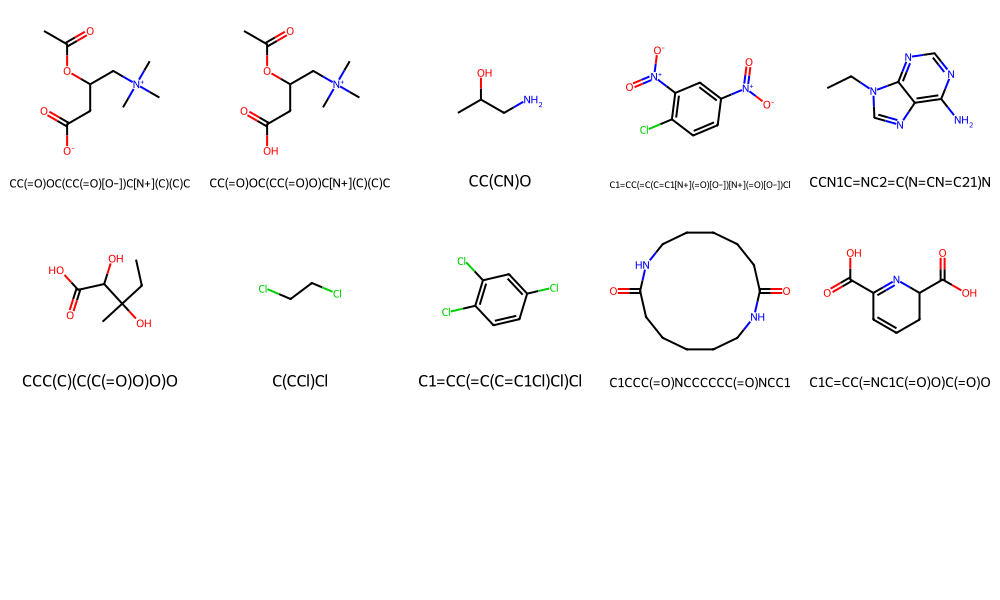

In [5]:
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(mol) for mol in df['smiles']],
    molsPerRow=5,
    legends=[smiles for smiles in df['smiles']],
    subImgSize=(200,200)
)

***

## Trabalhando com moléculas quimicamente impossíveis

In [6]:
mol_2 = Chem.MolFromSmiles(df['smiles'].iloc[-1])
print(mol_2)

None


[13:13:13] Explicit valence for atom # 0 C, 5, is greater than permitted


***

# Como filtrar conjuntos de dados, excluindo moléculas impossíveis?

In [7]:
def rdkit_mol(smile: str):
    return Chem.MolFromSmiles(smile)

df['mol'] = df['smiles'].apply(rdkit_mol)
df

[13:13:13] Explicit valence for atom # 0 C, 5, is greater than permitted


,smiles,mw,mol
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
2,CC(CN)O,75.11,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
4,CCN1C=NC2=C(N=CN=C21)N,163.18,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
5,CCC(C)(C(C(=O)O)O)O,148.16,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
6,C(CCl)Cl,98.96,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...


In [8]:
df.dropna(ignore_index=True, inplace=True)
df

,smiles,mw,mol
0,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,203.24,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
1,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,204.24,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
2,CC(CN)O,75.11,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
3,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,202.55,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
4,CCN1C=NC2=C(N=CN=C21)N,163.18,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
5,CCC(C)(C(C(=O)O)O)O,148.16,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
6,C(CCl)Cl,98.96,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
7,C1=CC(=C(C=C1Cl)Cl)Cl,181.40,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
8,C1CCC(=O)NCCCCCC(=O)NCC1,226.32,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...
9,C1C=CC(=NC1C(=O)O)C(=O)O,169.13,<rdkit.Chem.rdchem.Mol object at 0x00000255B86...


***

# Adicionando/removendo hidrogênios

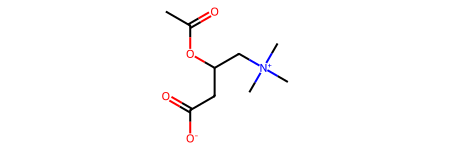

In [9]:
df['mol'].iloc[0]

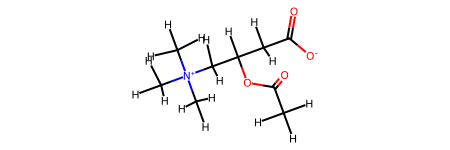

In [10]:
mol_h = Chem.AddHs(df['mol'].iloc[0])
mol_h

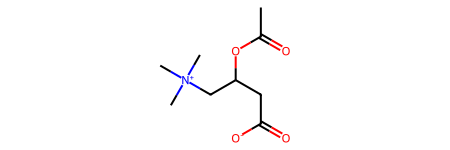

In [11]:
mol_nh = Chem.RemoveHs(mol_h)
mol_nh

***

## Padronizando SMILES

In [12]:
smiles = pd.DataFrame(
    {
        'smiles' : ['c1ccccc1', 'C1=CC=CC=C1', 'c1ccc(cc1)']
    }
)

smiles

,smiles
0,c1ccccc1
1,C1=CC=CC=C1
2,c1ccc(cc1)


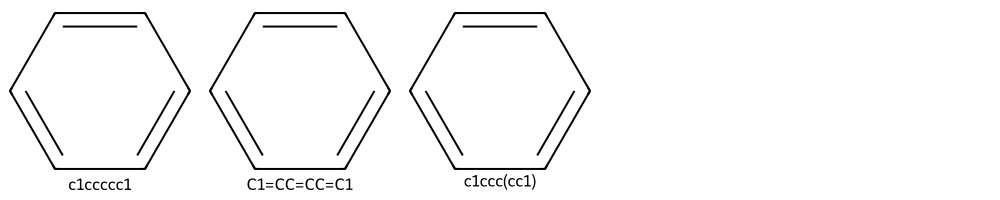

In [13]:
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(mol) for mol in smiles['smiles']],
    molsPerRow=5,
    legends=[smiles for smiles in smiles['smiles']],
    subImgSize=(200,200)
)

In [14]:
def canonical_smiles(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(mol, canonical=True)

smiles['canonical'] = smiles['smiles'].apply(canonical_smiles)
smiles

,smiles,canonical
0,c1ccccc1,c1ccccc1
1,C1=CC=CC=C1,c1ccccc1
2,c1ccc(cc1),c1ccccc1


In [17]:
smiles = smiles.drop_duplicates(subset=['canonical'])
smiles

,smiles,canonical
0,c1ccccc1,c1ccccc1
